In [4]:
%matplotlib inline
import matplotlib

matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import aifc
import os
import tensorflow as tf
import random
import pandas as pd
from load_and_generate import *
import seaborn as sns

print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


# Ground-truth

In [5]:
data_loc = '../whale-inputs/data' 
train_folder = 'train'
file_path = os.path.join(data_loc,train_folder) #change to test if desired

ground_truth = pd.read_csv(data_loc + '/train.csv', index_col= 0)
ground_truth.index.name

'clip_name'

In [6]:
ground_truth.label.unique()

array([0, 1])

In [7]:
ground_truth.head(10)

,label
clip_name,
train1.aiff,0
train2.aiff,0
train3.aiff,0
train4.aiff,0
train5.aiff,0
train6.aiff,1
train7.aiff,1
train8.aiff,0
train9.aiff,1


In [8]:
df = pd.concat([ground_truth, pd.get_dummies(ground_truth.label)], axis=1); 
print(df.head(10))

whales = df[df[1]==1].index.values
no_whales = df[df[0]==1].index.values

              label    0    1
clip_name                    
train1.aiff       0  1.0  0.0
train2.aiff       0  1.0  0.0
train3.aiff       0  1.0  0.0
train4.aiff       0  1.0  0.0
train5.aiff       0  1.0  0.0
train6.aiff       1  0.0  1.0
train7.aiff       1  0.0  1.0
train8.aiff       0  1.0  0.0
train9.aiff       1  0.0  1.0
train10.aiff      0  1.0  0.0


## Plot data distribution in training dataset

In [9]:
style_array= plt.style.available
s = pd.Series(style_array)
print s

0         seaborn-darkgrid
1         seaborn-notebook
2                  classic
3            seaborn-ticks
4                grayscale
5                      bmh
6             seaborn-talk
7          dark_background
8                   ggplot
9          fivethirtyeight
10      seaborn-colorblind
11            seaborn-deep
12       seaborn-whitegrid
13          seaborn-bright
14          seaborn-poster
15           seaborn-muted
16           seaborn-paper
17           seaborn-white
18          seaborn-pastel
19            seaborn-dark
20    seaborn-dark-palette
dtype: object


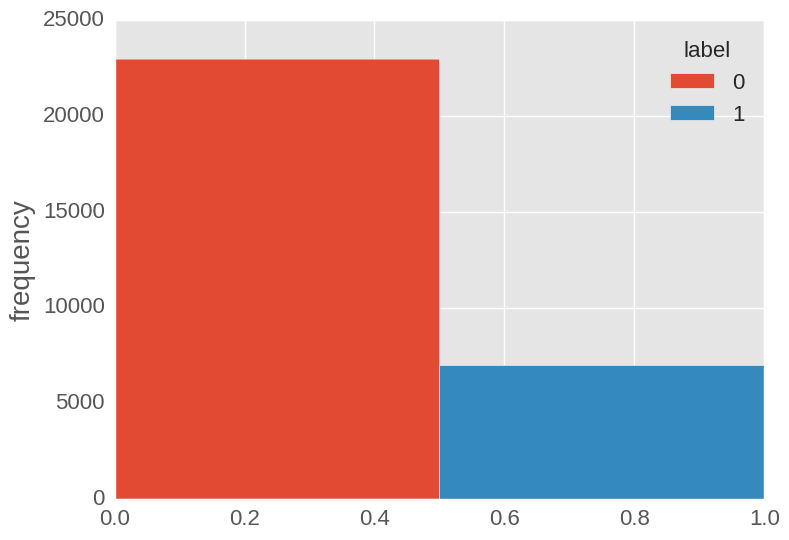

In [10]:
matplotlib.style.use(s[8])
def get_true(y):
    return (y if y>=.5 else None)

def get_false(y):
    return (y if y<.5 else None)

df = ground_truth.copy(deep = True)

df[1] = ground_truth["label"].apply(get_true)
df[0] = ground_truth["label"].apply(get_false)

ax = df[[0,1]].plot.hist(bins = 2)
fig = ax.get_figure()
ax.set_xlabel('',fontsize=20)
ax.set_ylabel('frequency',fontsize=20)
ax.tick_params(labelsize=16)
lg= ax.legend(title = "label", fontsize= 16)
lg.get_title().set_fontsize('16')
fig.tight_layout()

fig.savefig('../MLNP/capstone/images/2_dataset.png', format= "png")


# Data exploration
Plot some samples of each type of file spectogram o see the difference and draw conclusions.

['train26535.aiff',
 'train20028.aiff',
 'train25971.aiff',
 'train19531.aiff',
 'train20387.aiff',
 'train3727.aiff',
 'train17485.aiff',
 'train27393.aiff',
 'train13303.aiff',
 'train29391.aiff']

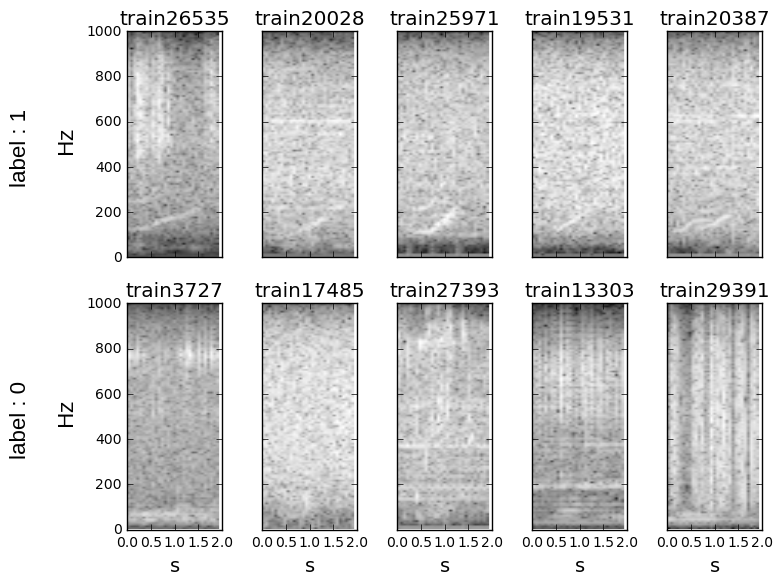

In [175]:
import soundfile as sf
import sounddevice as sd
N_plot = 10
N_play= N_plot/2

Pxx_array = []
file_name_array = []
file_path = '../data/train'
labels = []

matplotlib.style.use("classic")

plt.figure(figsize=(10.,10.), facecolor= "white")
fig, ax = plt.subplots(N_plot/4, 5, sharex= True, sharey=True, facecolor= "white")

#Right -whales
for i, file_name in enumerate(random.sample(whales, N_play)):

    f = aifc.open(file_path +'/'+ file_name, 'r')
    str_frames = f.readframes(f.getnframes())
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    ax[0][i].set_title(file_name[:-5] )
    ax[0][i].tick_params(labelsize=10)
    if i == 0:
        ax[0][i].set_ylabel('label : 1 \n\n Hz', fontsize=16)
    Pxx, freqs, bins, im = ax[0][i].specgram(time_data,Fs=Fs,noverlap=128,cmap='gray')
    Pxx_array.append(Pxx)
    file_name_array.append(file_name)

#Non- right whales
for i, file_name in enumerate(random.sample(no_whales, N_play)):
    f = aifc.open(file_path +'/'+ file_name, 'r')
    str_frames = f.readframes(f.getnframes())
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    Pxx, freqs, bins, im = ax[1][i].specgram(time_data,Fs=Fs,noverlap=128,cmap='gray')
    ax[1][i].set_title(file_name[:-5])
    ax[1][i].set_xlabel('s', fontsize=14)
    ax[1][i].tick_params(labelsize=10)
    if i == 0:
        ax[1][i].set_ylabel('label : 0 \n\n Hz', fontsize=16)
        labels.append(ax[1][i].get_xticks().tolist()) #save ticks for xaxis and yaxis for plotting
        labels.append([int(x) for x in ax[1][i].get_yticks().tolist()])
    Pxx_array.append(Pxx)
    file_name_array.append(file_name)

fig.tight_layout()
#fig.savefig('../MLNP/capstone/images/2_samples.png', format= "png")

## mean substraction and normalization

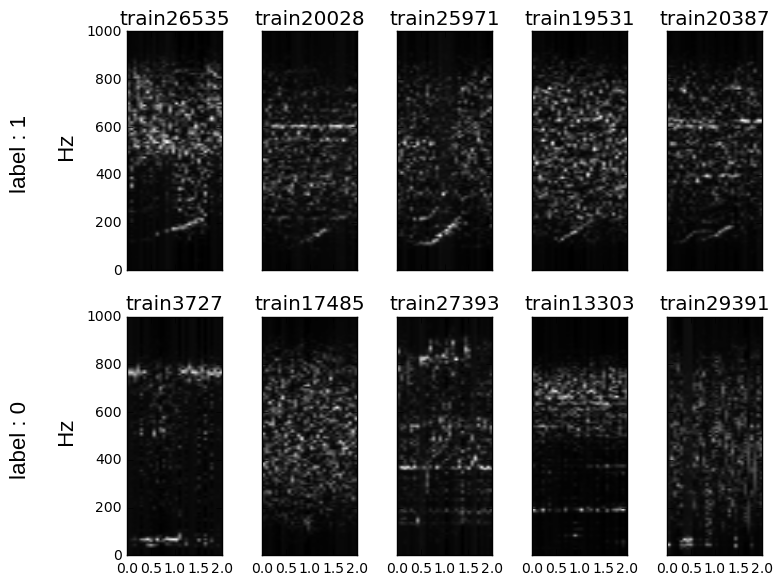

In [176]:
from scipy.misc import imresize
from sklearn import preprocessing
from matplotlib.ticker import FormatStrFormatter

 
file_path= '../data/train'

matplotlib.style.use("classic")

plt.figure(figsize=(10.,10.), facecolor= "white")
fig, ax = plt.subplots(N_plot/4, 5, sharex= True, sharey=True, facecolor= "white")

#Right -whales
for i, file_name in enumerate(file_name_array[:N_play]):
    # spectrogram of file
    Pxx_prep = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(Pxx_array[i]) #rescale by std
    Pxx_ = (Pxx_prep*255.0).astype(int)
    ax[0][i].imshow(Pxx_, origin= 'lower', cmap= 'gray', aspect= 'auto', extent=[0,2.0,0,1000])
    ax[0][i].set_title(file_name[:-5] )
    if i == 0:
        ax[0][i].yaxis.set_ticklabels(labels[1])

        ax[0][i].set_ylabel('label : 1 \n\n Hz', fontsize=16)

    ax[0][i].tick_params(labelsize=10)


#Non- right whales
for i, file_name in enumerate(file_name_array[N_play:]):
    # spectrogram of file
    Pxx_prep = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(Pxx_array[i+N_play]) #rescale by std
    Pxx_ = (Pxx_prep*255.0).astype(int)
    ax[1][i].imshow(Pxx_, origin= 'lower', cmap= 'gray', aspect= 'auto', extent=[0,2.0,0,1000])
    ax[1][i].set_title(file_name[:-5])
    #ax[1][i].set_xlim(bins.min(),bins.max()) 
    #ax[1][i].set_xticklabels(labels[0])
    #ax[1][i].set_xlabel('s', fontsize=14)    
    if i == 0:
        ax[1][i].yaxis.set_major_formatter(FormatStrFormatter('%d'))
        ax[1][i].set_yticklabels(labels[1])
        ax[1][i].set_ylabel('label : 0 \n\n Hz', fontsize=16)
    ax[1][i].tick_params(labelsize=10)
    
fig.tight_layout()
fig.savefig('../MLNP/capstone/images/2_samples_unprocessed.png', format= "png")    

## log10, mean substraction and normalization

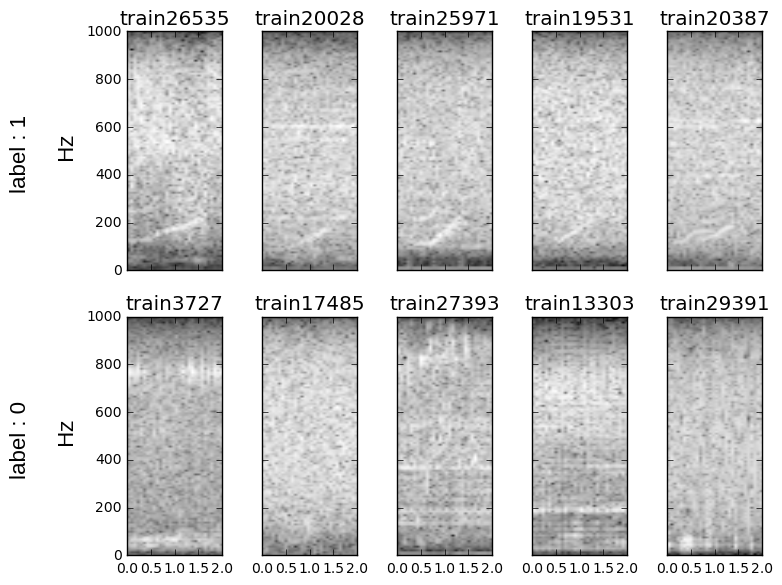

In [179]:
from scipy.misc import imresize
from sklearn import preprocessing
from matplotlib.ticker import FormatStrFormatter

Pxx_log 
file_path= '../data/train'

matplotlib.style.use("classic")


plt.figure(figsize=(10.,10.), facecolor= "white")
fig, ax = plt.subplots(N_plot/4, 5, sharex= True, sharey=True, facecolor= "white")

#Right -whales
for i, file_name in enumerate(file_name_array[:N_play]):
    # spectrogram of file
    Pxx_log =  np.log10(Pxx_array[i])
    Pxx_prep = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(Pxx_log) #rescale by std
    Pxx_ = (Pxx_prep*255.0).astype(int)
    ax[0][i].imshow(Pxx_, origin= 'lower', cmap= 'gray', aspect= 'auto', extent=[0,2.0,0,1000])
    ax[0][i].set_title(file_name[:-5] )
    if i == 0:
        ax[0][i].yaxis.set_ticklabels(labels[1])
        ax[0][i].yaxis.set_major_formatter(FormatStrFormatter('%d'))
        ax[0][i].set_ylabel('label : 1 \n\n Hz', fontsize=16)

    ax[0][i].tick_params(labelsize=10)


#Non- right whales
for i, file_name in enumerate(file_name_array[N_play:]):
    # spectrogram of file
    Pxx_log =  np.log10(Pxx_array[i+N_play])
    Pxx_prep = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(Pxx_log) #rescale by std
    Pxx_ = (Pxx_prep*255.0).astype(int)
    ax[1][i].imshow(Pxx_, origin= 'lower', cmap= 'gray', aspect= 'auto', extent=[0,2.0,0,1000])
    ax[1][i].set_title(file_name[:-5])
    #ax[1][i].set_xlim(bins.min(),bins.max()) 
    #ax[1][i].set_xticklabels(labels[0])
    #ax[1][i].set_xlabel('s', fontsize=14)    
    if i == 0:
        ax[1][i].yaxis.set_major_formatter(FormatStrFormatter('%d'))
        ax[1][i].set_yticklabels(labels[1])
        ax[1][i].set_ylabel('label : 0 \n\n Hz', fontsize=16)
    ax[1][i].tick_params(labelsize=10)
    
fig.tight_layout()
fig.savefig('../MLNP/capstone/images/2_samples_processed.png', format= "png")    

# Image cropping


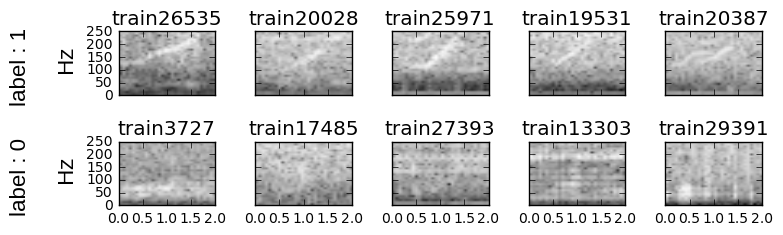

In [201]:
from scipy.misc import imresize
from sklearn import preprocessing
from matplotlib.ticker import FormatStrFormatter

Pxx_log 
file_path= '../data/train'

matplotlib.style.use("classic")


plt.figure(figsize=(10.,10.), facecolor= "white")
fig, ax = plt.subplots(2, 5, sharex= True, sharey=True, facecolor= "white")
fig.set_figheight(2.5)
#Right -whales
for i, file_name in enumerate(file_name_array[:N_play]):
    # spectrogram of file
    Pxx_log =  np.log10(Pxx_array[i])
    Pxx_prep = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(Pxx_log) #rescale by std
    Pxx_ = (Pxx_prep*255.0).astype(int)
    ax[0][i].imshow(Pxx_, origin= 'lower', cmap= 'gray', aspect= 'auto', extent=[0,2.0,0,1000])
    ax[0][i].set_title(file_name[:-5] )
    if i == 0:
        ax[0][i].set_ylim(0,250)
        ax[0][i].set_ylabel('label : 1 \n\n Hz', fontsize=16)

    ax[0][i].tick_params(labelsize=10)


#Non- right whales
for i, file_name in enumerate(file_name_array[N_play:]):
    # spectrogram of file
    Pxx_log =  np.log10(Pxx_array[i+N_play])
    Pxx_prep = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(Pxx_log) #rescale by std
    Pxx_ = (Pxx_prep*255.0).astype(int)
    ax[1][i].imshow(Pxx_, origin= 'lower', cmap= 'gray', aspect= 'auto', extent=[0,2.0,0,1000])
    ax[1][i].set_title(file_name[:-5])  
    if i == 0:
        ax[0][i].set_ylim(0,250)
        ax[1][i].set_ylabel('label : 0 \n\n Hz', fontsize=16)
    ax[1][i].tick_params(labelsize=10)
    
fig.tight_layout()
fig.savefig('../MLNP/capstone/images/2_samples_cropped.png', format= "png")    